In [3]:
import pandas as pd
import numpy as np
import warnings
from qiskit import IBMQ
from qiskit import *
import os
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import pandas as pd
from qiskit import Aer, QuantumCircuit, execute
from qiskit_machine_learning.algorithms import QSVC
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit.utils import QuantumInstance
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore", category=DeprecationWarning)
from qiskit import IBMQ
import matplotlib.pyplot as plt
from qiskit_algorithms.utils import algorithm_globals
algorithm_globals.random_seed = 12345
print('complete')

complete


In [4]:
print(os.getcwd())

C:\Users\theda


In [5]:
data_full = pd.read_csv('crop yield data sheet - Copy.csv')
data = data_full.sample(frac=1.0)
        
print (len(data_full))
print (len(data))
data.head(6)

98
98


,1,2,3,4,5,6,7
29,1200,72,29,73,21,19,10
21,1280,76,26,75,24,19,11
28,405,55,36,60,21,16,7
80,1200,77,29,76,22,19,10
10,1280,80,26,80,24,20,12
35,500,50,37,65,18,19,9


In [6]:
data_array1 = np.array(data['1'])
data_array2 = np.array(data['2'])
data_array3 = np.array(data['3'])
data_array4 = np.array(data['4'])
data_array = np.vstack((data_array1, data_array2, data_array3, data_array4)).T
print(data_array)

[[1200   72   29   73]
 [1280   76   26   75]
 [ 405   55   36   60]
 [1200   77   29   76]
 [1280   80   26   80]
 [ 500   50   37   65]
 [ 480   65   36   68]
 [ 460   60   39   60]
 [1200   75   27   79]
 [1250   75   27   75]
 [ 410   55   38   68]
 [ 475   55   39   61]
 [ 415   55   38   65]
 [ 425   50   37   65]
 [1225   79   29   79]
 [ 400   50   39   60]
 [ 475   65   38   60]
 [1250   77   28   78]
 [1245   77   27   75]
 [1250   77   28   76]
 [ 475   60   37   63]
 [ 460   55   38   61]
 [ 450   65   35   70]
 [1150   80   26   75]
 [ 450   50   37   60]
 [1280   73   28   75]
 [1250   75   29   78]
 [ 425   55   38   65]
 [ 450   59   40   67]
 [ 425   60   39   60]
 [1200   77   27   78]
 [ 500   70   34   74]
 [1200   79   27   77]
 [1225   75   28   79]
 [1300   70   24   70]
 [ 410   60   39   65]
 [ 400   50   40   60]
 [ 450   50   37   65]
 [ 400   60   39   60]
 [ 425   60   39   65]
 [ 475   72   36   71]
 [1225   73   29   73]
 [1300   80   28   80]
 [1230   80

In [20]:
target_array = data["7"] 
for i in range(len(target_array)):

    if target_array[i] < 10:
        target_array[i] = 0


    if target_array[i] > 9:
        target_array[i] = 1

print(target_array)

29    1
21    1
28    0
80    1
10    1
     ..
96    1
41    0
68    1
7     0
14    1
Name: 7, Length: 98, dtype: int64


In [8]:
features = data_array
labels = np.array(target_array)

In [9]:
from sklearn.preprocessing import MinMaxScaler

features = MinMaxScaler().fit_transform(features)

In [10]:
feature_names = ['1', '2', '3', '4']
feature_names_array = np.array(feature_names)
print(feature_names_array)

['1' '2' '3' '4']


D:\Coding\envs\Qiskit\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\Coding\envs\Qiskit\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\Coding\envs\Qiskit\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\Coding\envs\Qiskit\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When 

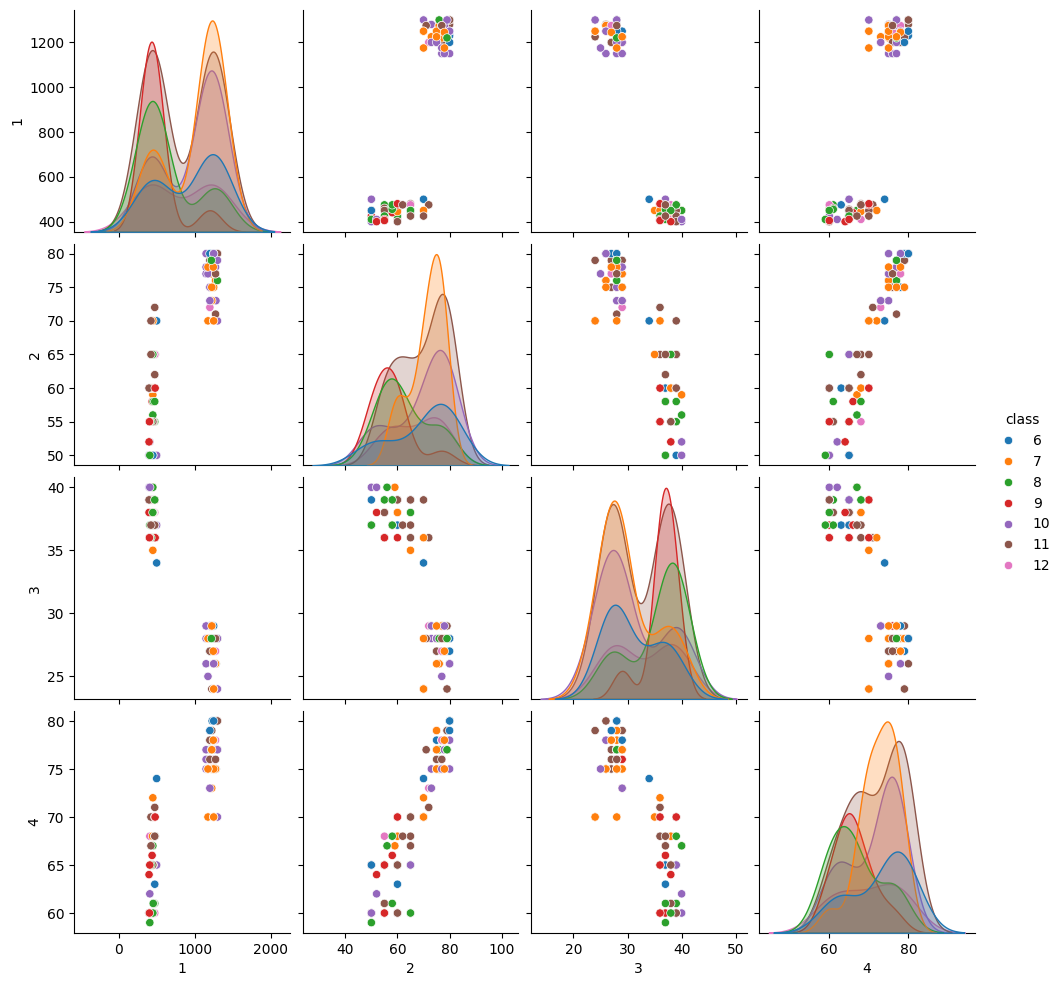

In [11]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(data_array, columns=feature_names_array)
df["class"] = pd.Series(target_array)

sns.pairplot(df, hue="class", palette="tab10")

In [12]:
from sklearn.model_selection import train_test_split
from qiskit_algorithms.utils import algorithm_globals

algorithm_globals.random_seed = 123
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.7, random_state=algorithm_globals.random_seed
)

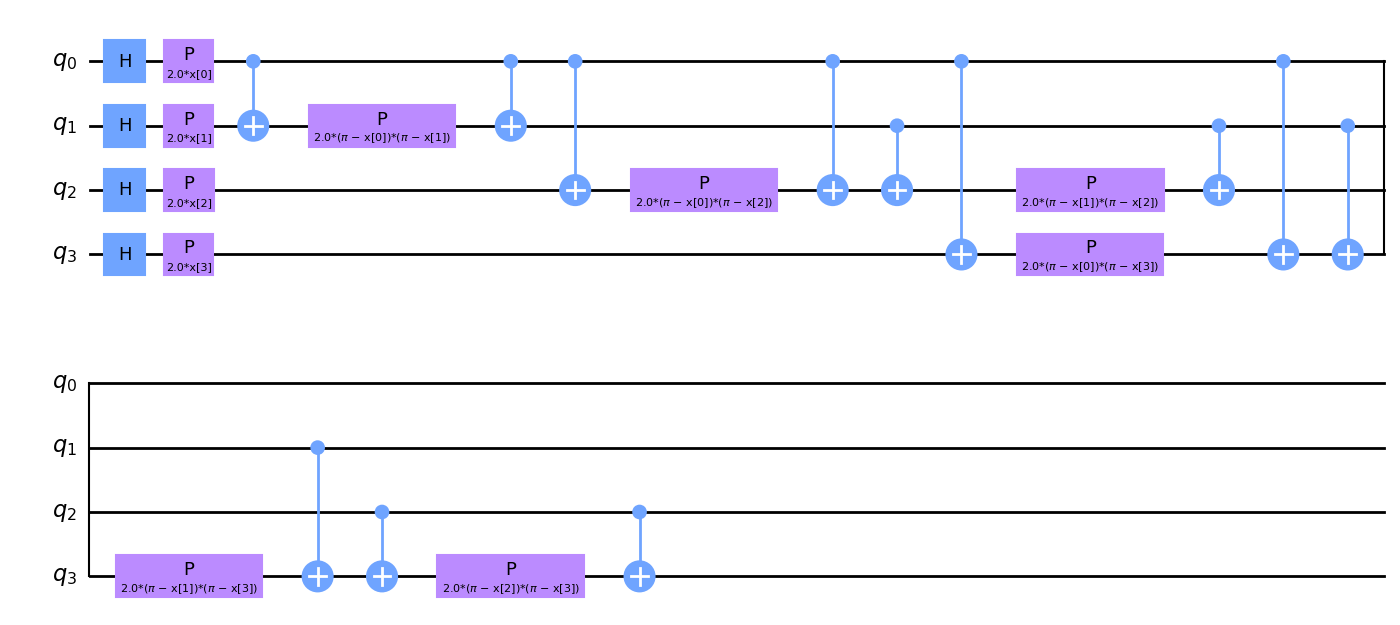

In [13]:
from qiskit.circuit.library import ZZFeatureMap

num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", style="clifford", fold=20)

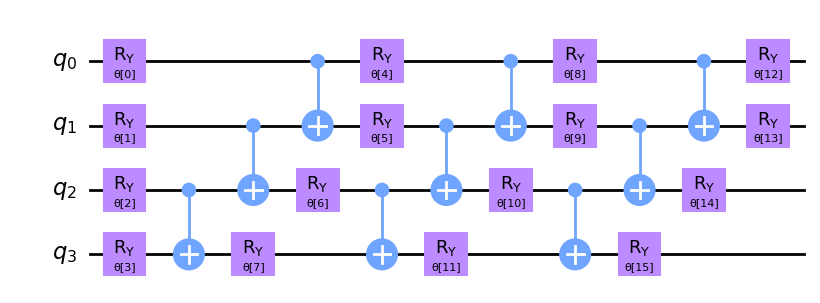

In [14]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", style="clifford", fold=20)

In [15]:
from qiskit_algorithms.optimizers import COBYLA

optimizer = COBYLA(maxiter=100)

In [16]:
from qiskit.primitives import Sampler

sampler = Sampler()

In [17]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

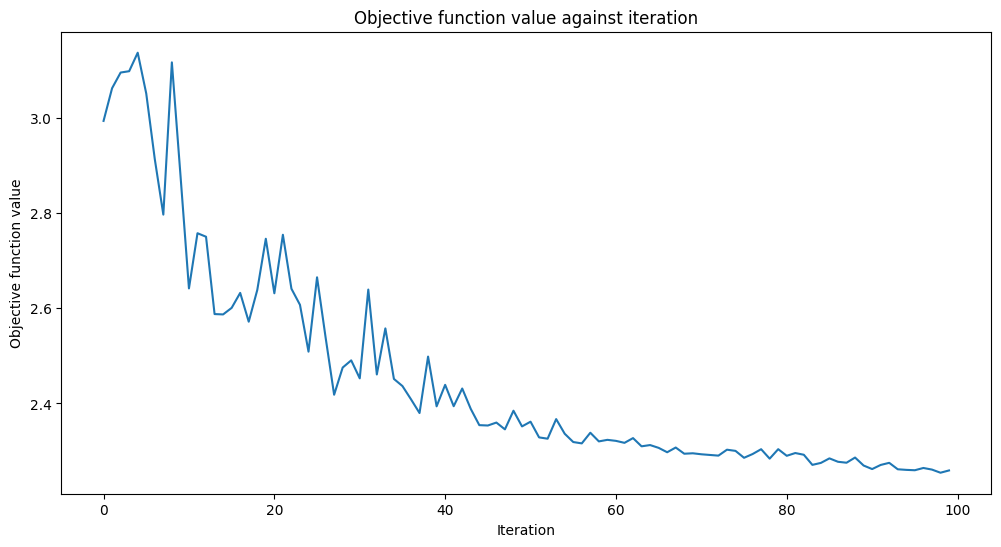

Training time: 88 seconds


In [18]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
print(train_labels[:5])
print(train_features[:5])
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [19]:
train_score_q2_ra = vqc.score(train_features, train_labels)
test_score_q2_ra = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset using RealAmplitudes: {train_score_q2_ra:.2f}")
print(f"Quantum VQC on the test dataset using RealAmplitudes:     {test_score_q2_ra:.2f}")

Quantum VQC on the training dataset using RealAmplitudes: 0.41
Quantum VQC on the test dataset using RealAmplitudes:     0.43
